In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from scipy.spatial import KDTree

In [23]:
df = pd.read_csv('uav_navigation_dataset.csv').head(30)

In [24]:
# Define sensor data matrix (trajectory-related features)
sensor_columns = ['latitude', 'longitude', 'altitude', 
                  'imu_acc_x', 'imu_acc_y', 'imu_acc_z', 
                  'imu_gyro_x', 'imu_gyro_y', 'imu_gyro_z',
                  'lidar_distance', 'speed']
A = df[sensor_columns].values

In [25]:
# Apply Singular Value Decomposition (SVD) for trajectory smoothing
svd = TruncatedSVD(n_components=3)  # Keeping only the top 3 components
A_reduced = svd.fit_transform(A)
A_reconstructed = svd.inverse_transform(A_reduced)


In [ ]:
df_svd = pd.DataFrame(A_reconstructed, columns=sensor_columns)

In [32]:
# Convert back to DataFrame
df_svd

,latitude,longitude,altitude,imu_acc_x,imu_acc_y,imu_acc_z,imu_gyro_x,imu_gyro_y,imu_gyro_z,lidar_distance,speed
0,30.939797,-100.267597,224.357365,-0.288565,-0.370623,-0.543157,68.744423,25.283863,-59.479027,52.775314,13.596547
1,25.800778,-83.614794,222.888335,-1.102905,0.100104,-0.156276,-4.098554,-155.615028,-157.166007,34.929530,9.774677
2,30.436088,-98.628728,144.036057,-0.230010,0.174244,-0.881457,163.718583,55.932393,-150.211818,65.043958,11.945561
3,33.353317,-108.095569,336.393611,-1.187495,-0.424585,-0.027263,-60.402024,-167.986386,-96.559191,37.850059,14.261199
4,36.044129,-116.809465,262.124590,-0.320910,-0.449527,-0.631891,79.453468,32.209339,-65.553677,61.408611,15.895790
5,51.590807,-167.195340,420.625665,-0.809517,-0.711565,-0.647525,50.474484,-33.973783,-96.652578,78.993054,22.751123
6,22.012995,-71.332491,84.700502,0.154548,0.020394,-0.775084,148.895150,107.868901,-76.743837,51.460625,9.095311
7,40.762765,-132.105563,337.686140,-0.003328,-1.104953,-0.590329,45.845116,95.003171,44.999780,63.754877,19.781423
8,43.560665,-141.173608,378.488399,-0.518206,-0.908214,-0.470300,16.967244,-2.933299,-21.059679,63.342843,20.129235
9,41.592121,-134.795630,387.553433,-0.735136,-0.875893,-0.294871,-20.989684,-56.409348,-28.681433,55.217049,19.115998


In [27]:
# Obstacle Detection & Avoidance Enhancement
obstacle_threshold = df['lidar_distance'].quantile(0.1)  # Define obstacle detection threshold

df['obstacle_detected'] = df['lidar_distance'] < obstacle_threshold


In [28]:
# Identify risk zones using KDTree
obstacle_positions = df[df['obstacle_detected']][['latitude', 'longitude']].values
kdtree = KDTree(obstacle_positions)
df['risk_zone'] = [len(kdtree.query_ball_point((lat, lon), 0.0005)) > 0 for lat, lon in zip(df['latitude'], df['longitude'])]


In [29]:
# Real-Time Path Planning Optimization
# Using speed and IMU data to adjust flight path dynamically
optimal_speed_threshold = df['speed'].quantile(0.9)
df['optimal_path'] = (df['speed'] > optimal_speed_threshold) & (~df['obstacle_detected'])

In [30]:
df_obstacles = df[df['obstacle_detected'] == 1]
if df_obstacles.empty:
    print("⚠️ No obstacles detected in dataset!")


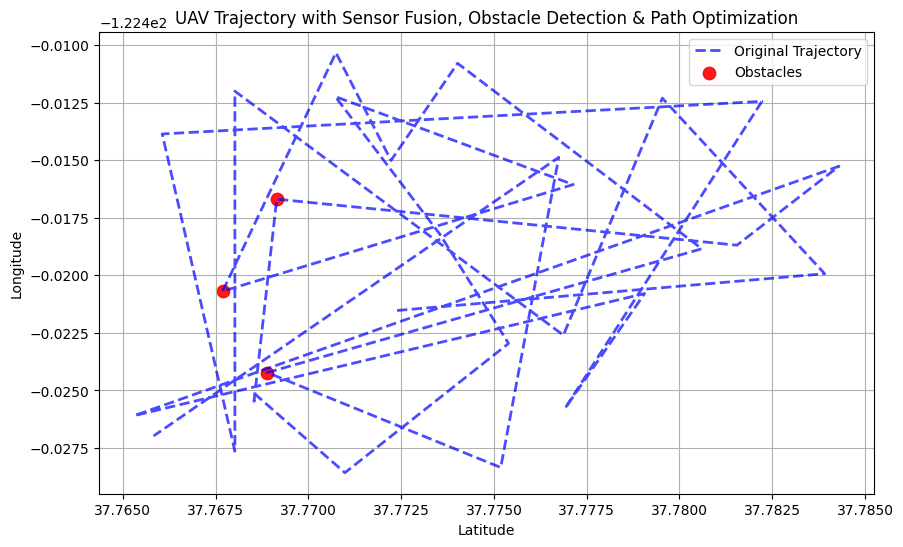

In [33]:

# Visualizing the original vs. smoothed trajectory with obstacles
plt.figure(figsize=(10, 6))

plt.plot(df['latitude'], df['longitude'], 'b--', label='Original Trajectory', linewidth=2, alpha=0.7)
plt.scatter(df_obstacles['latitude'], df_obstacles['longitude'], color='red', marker='o', label='Obstacles', s=80, alpha=0.9)


plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("UAV Trajectory with Sensor Fusion, Obstacle Detection & Path Optimization")
plt.legend()
plt.grid()
plt.show()

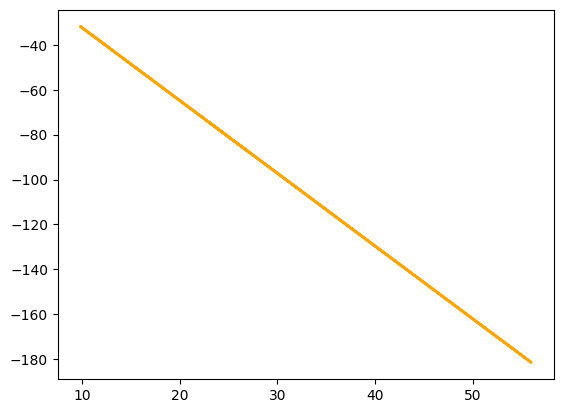

In [11]:
plt.plot(df_svd['latitude'], df_svd['longitude'], color='orange', label='Smoothed Trajectory (SVD)', linewidth=2)


In [12]:
# Save the processed data
df.to_csv('uav_navigation_enhanced.csv', index=False)

df_svd.to_csv('svd_denoised_uav_trajectory.csv', index=False)